## Import dependencies

In [76]:
import pandas as pd
import seaborn as sns
import time

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import joblib

## Read data

In [97]:
X_train = pd.read_csv("../data/train_test/X_train.csv",header=None)
X_test = pd.read_csv("../data/train_test/X_test.csv", header=None)
y_train = pd.read_csv("../data/train_test/y_train.csv", header=None)
y_test = pd.read_csv("../data/train_test/y_test.csv", header=None)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1,)
y_test = y_test.to_numpy().reshape(-1,)

## Build pipeline

### Select classifier 

First, I test some classifier, than I can choose one for parameter optimization to get better results.

In [96]:

knc = KNeighborsClassifier()
lr = LogisticRegression(solver="newton-cg")
svc = SVC()
rfc = RandomForestClassifier()
nbc = MultinomialNB()
#gbc = GradientBoostingClassifier()
bc = BaggingClassifier()

ml_models = models = {"knc": knc, "lr": lr, "svc": svc, "rfc": rfc,
                      'nb' : MultinomialNB(),
                       'bc' : BaggingClassifier()}

In [90]:
def initial_model(X_train, X_test, y_train, y_test, ml_models):
    
    
    
    for model in ml_models:
          
        if model != 'nb':
            
            pipe = Pipeline([("imputer", SimpleImputer(fill_value = 0)),
                     ('scaler', StandardScaler()), (model, ml_models[model])])
        else:
            
            pipe = Pipeline([("imputer", SimpleImputer(fill_value = 0)),
                     ('minmax',MinMaxScaler()), (model, ml_models[model])])
        
        start_train = time.time()
        pipe.fit(X_train, y_train)
        train_time = round(time.time()-start_train,1)
        
        accuracy = accuracy_score(y_test,pipe.predict(X_test))
        recall = recall_score(y_test,pipe.predict(X_test), average=None)
        precision = precision_score(y_test,pipe.predict(X_test), average=None)
        f1 = f1_score(y_test,pipe.predict(X_test), average=None)
        
        print('*'*20)
        print(f'Scores of {model}:')
        print('*'*20)
        print(f'Train time: {train_time}s')
        print(f'Accuracy score: {accuracy}')
        print('\n')
        print(f'Recall score: {recall}')
        print('\n')
        print(f'Precision score: {precision}')
        print('\n')
        print(f'F1 score: {f1}')
        print('\n')
    

In [91]:
initial_model(X_train,X_test,y_train,y_test,ml_models)

********************
Scores of knc:
********************
Train time: 0.4s
Accuracy score: 0.8770277341705913


Recall score: [0.97993311 0.94014085 0.91489362 0.77891156 0.89666667 0.99367089
 0.6        0.5        0.61764706 0.43589744 0.41176471 0.36      ]


Precision score: [0.85422741 0.91438356 0.96846847 0.8740458  0.81515152 0.98125
 0.78947368 0.8125     0.58333333 0.62962963 0.60869565 0.42857143]


F1 score: [0.91277259 0.92708333 0.94091904 0.82374101 0.85396825 0.98742138
 0.68181818 0.61904762 0.6        0.51515152 0.49122807 0.39130435]


********************
Scores of lr:
********************
Train time: 6.4s
Accuracy score: 0.9225536368393511


Recall score: [0.97658863 0.96830986 0.96595745 0.86054422 0.94       0.99367089
 0.8        0.53846154 0.70588235 0.53846154 0.64705882 0.76      ]


Precision score: [0.96369637 0.95818815 0.97008547 0.93014706 0.88125    0.98432602
 0.68965517 0.875      0.63157895 0.77777778 0.66666667 0.57575758]


F1 score: [0.97009967 0.9

## Final model

In the initial test, in the previous section I tried out some of the classification models in sklearn. There are some model with really high accuracy. Most of the models without any parameter tuning, show us a high accuracy. The fastest model was the `Naive Bayes` but the accuracy wasn't so high. The `Random Forest Classifier` has the highest accuracy score, and the calculation speed is not so bad. I will test out this model. 

### RandomForestClassifier 

In [121]:
rfc_params = {'rfc__n_estimators' : [100],
              'rfc__max_depth' : [2, 20, 50],
              'rfc__min_samples_split' : [2, 5, 10],
              'rfc__min_samples_leaf' : [1, 2, 10]} 

In [122]:
 def random_search(model, params):
        
    pipe = Pipeline([("imputer", SimpleImputer(fill_value = 0)),
                     ('scaler', StandardScaler()), ("rfc", model)])
                     
    search = GridSearchCV(pipe, param_grid=params)
    
    return search

In [123]:
model = random_search(RandomForestClassifier(),rfc_params)

In [ ]:
model.fit(X_train,y_train)

In [262]:
model.best_params_

{'rfc__max_depth': 50,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 5,
 'rfc__n_estimators': 100}

In [112]:
start_train = time.time()
train_time = round(time.time()-start_train,1)

accuracy = accuracy_score(y_test,model.predict(X_test))
recall = recall_score(y_test,model.predict(X_test), average=None)
precision = precision_score(y_test,model.predict(X_test), average=None)
f1 = f1_score(y_test,model.predict(X_test), average=None)

print('*'*20)
print(f'Scores of {model}:')
print('*'*20)
print(f'Train time: {train_time}s')
print(f'Accuracy score: {accuracy}')
print('\n')
print(f'Recall score: {recall}')
print('\n')
print(f'Precision score: {precision}')
print('\n')
print(f'F1 score: {f1}')
print('\n')
    

********************
Scores of Pipeline(steps=[('imputer', SimpleImputer(fill_value=0)),
                ('scaler', StandardScaler()), ('svc', SVC())]):
********************
Train time: 0.0s
Accuracy score: 0.9105180533751962


Recall score: [0.97658863 0.95774648 0.96595745 0.84353741 0.92333333 0.99367089
 0.8        0.46153846 0.55882353 0.48717949 0.79411765 0.52      ]


Precision score: [0.95737705 0.90066225 0.97844828 0.91512915 0.86024845 0.98742138
 0.68965517 0.92307692 0.79166667 0.82608696 0.675      0.40625   ]


F1 score: [0.96688742 0.92832765 0.97216274 0.87787611 0.89067524 0.99053628
 0.74074074 0.61538462 0.65517241 0.61290323 0.72972973 0.45614035]




In [104]:
scores = cross_val_score(model, X_train, y_train, cv=3)

In [105]:
print('Accuracy of the model: {}% ±{}%'.format(round(np.mean(scores)*100,2), round(np.std(scores)*100,2)))

Accuracy of the model: 91.48% ±0.5%


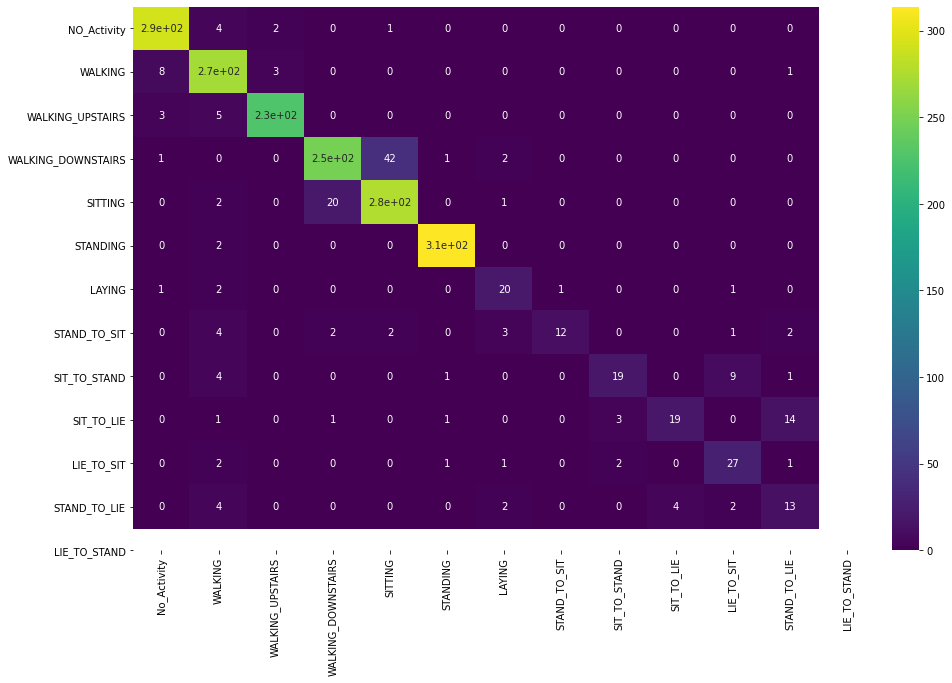

In [116]:
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), annot=True, cmap="viridis",
            xticklabels=["No_Activity","WALKING",
                       "WALKING_UPSTAIRS",
                       "WALKING_DOWNSTAIRS",
                       "SITTING",
                       "STANDING",
                       "LAYING",
                       "STAND_TO_SIT",
                       "SIT_TO_STAND",
                       "SIT_TO_LIE",
                       "LIE_TO_SIT",
                       "STAND_TO_LIE",
                       "LIE_TO_STAND"],
            yticklabels=['NO_Activity',"WALKING",
                       "WALKING_UPSTAIRS",
                       "WALKING_DOWNSTAIRS",
                       "SITTING",
                       "STANDING",
                       "LAYING",
                       "STAND_TO_SIT",
                       "SIT_TO_STAND",
                       "SIT_TO_LIE",
                       "LIE_TO_SIT",
                       "STAND_TO_LIE",
                       "LIE_TO_STAND"])

###  Saving the final model

In [117]:
import joblib

In [118]:
def save_model(model):
    '''Save the model to disk'''
    
    filename = '../models/har_model_v08.sav'
    joblib.dump(model, filename)
    readme = open('../models/ml_model_v07.txt', 'w')
    readme.write('Ml model with svc, without overlap 91% accuracy.')
    readme.close()

In [119]:
save_model(model)

In [108]:
features_to_drop

[('acc_x_FFT', 'peak_mean_6'),
 ('acc_x_FFT', 'peak_mean_8'),
 ('acc_x_FFT', 'peak_mean_12'),
 ('acc_y_FFT', 'peak_mean_6'),
 ('acc_y_FFT', 'peak_mean_8'),
 ('acc_y_FFT', 'peak_mean_12'),
 ('acc_z_FFT', 'peak_mean_6'),
 ('acc_z_FFT', 'peak_mean_8'),
 ('acc_z_FFT', 'peak_mean_12'),
 ('gyro_x_FFT', 'peak_mean_6'),
 ('gyro_x_FFT', 'peak_mean_8'),
 ('gyro_x_FFT', 'peak_mean_12'),
 ('gyro_y_FFT', 'peak_mean_6'),
 ('gyro_y_FFT', 'peak_mean_8'),
 ('gyro_y_FFT', 'peak_mean_12'),
 ('gyro_z_FFT', 'peak_mean_6'),
 ('gyro_z_FFT', 'peak_mean_8'),
 ('gyro_z_FFT', 'peak_mean_12')]